In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load the data
df = pd.read_csv('delhiaqi (1).csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  4

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values(by='date')


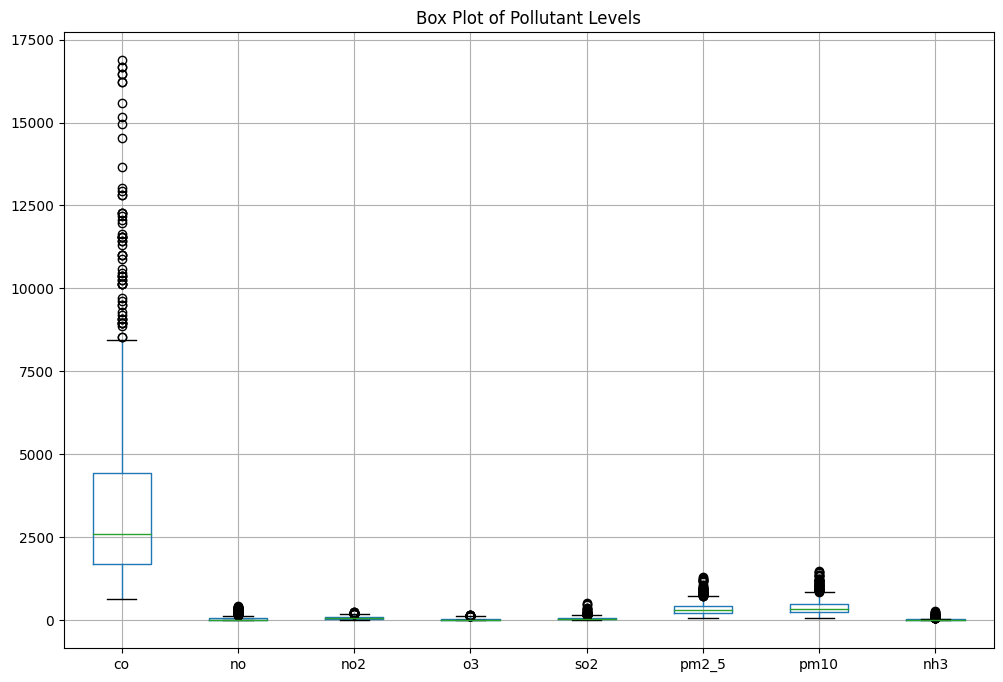

                          co     no    no2    o3    so2   pm2_5    pm10    nh3
date                                                                          
2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   5.83
2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   7.66
2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68  11.40
2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12  13.55
2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80  14.19


In [ ]:
# Box plot to visualize outliers for each pollutant
df.boxplot(figsize=(12,8))
plt.title('Box Plot of Pollutant Levels')
plt.show()

# Optionally, remove outliers based on Z-score or IQR
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

# Display data without outliers
print(df_no_outliers.head())

df = df_no_outliers

In [ ]:
# Calculate basic statistics for each pollutant
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# If there are missing values, you might want to handle them
# For example, you could fill them with the mean of the column
df = df.fillna(df.mean())


                 co          no         no2          o3         so2  \
count    526.000000  526.000000  526.000000  526.000000  526.000000   
mean    3272.524544   36.294316   70.313859   31.185513   54.924962   
std     2301.815173   55.818604   35.897836   39.437765   37.190183   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1682.280000    2.407500   43.870000    0.195000   26.700000   
50%     2456.670000   11.345000   62.380000   13.680000   44.110000   
75%     3938.677500   44.700000   89.110000   49.172500   69.382500   
max    12817.380000  296.830000  194.670000  148.770000  213.620000   

             pm2_5         pm10         nh3  
count   526.000000   526.000000  526.000000  
mean    323.647129   379.935684   20.065228  
std     173.150372   209.235814   19.988610  
min      60.100000    69.080000    0.630000  
25%     198.270000   237.357500    7.615000  
50%     295.910000   333.260000   14.125000  
75%     387.090000   451.792500   23.4

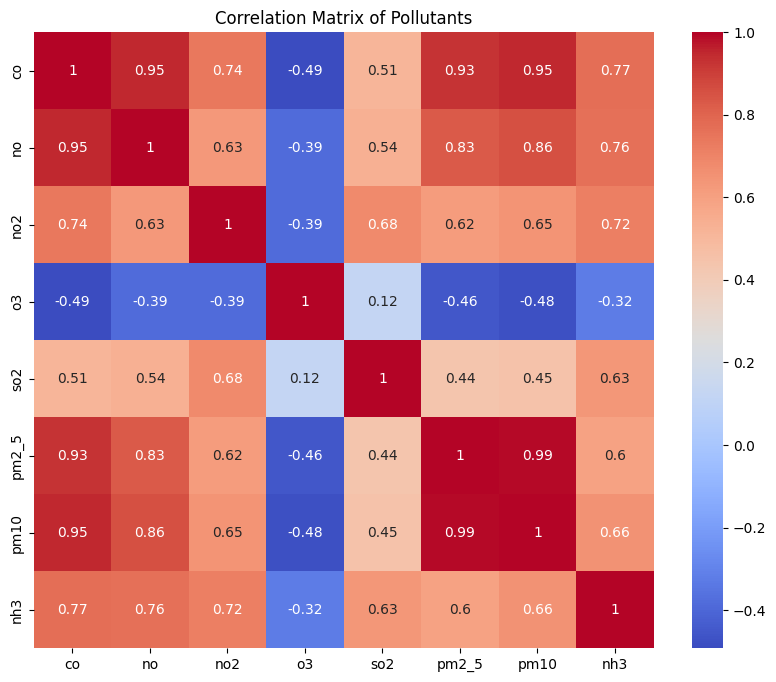

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.show()


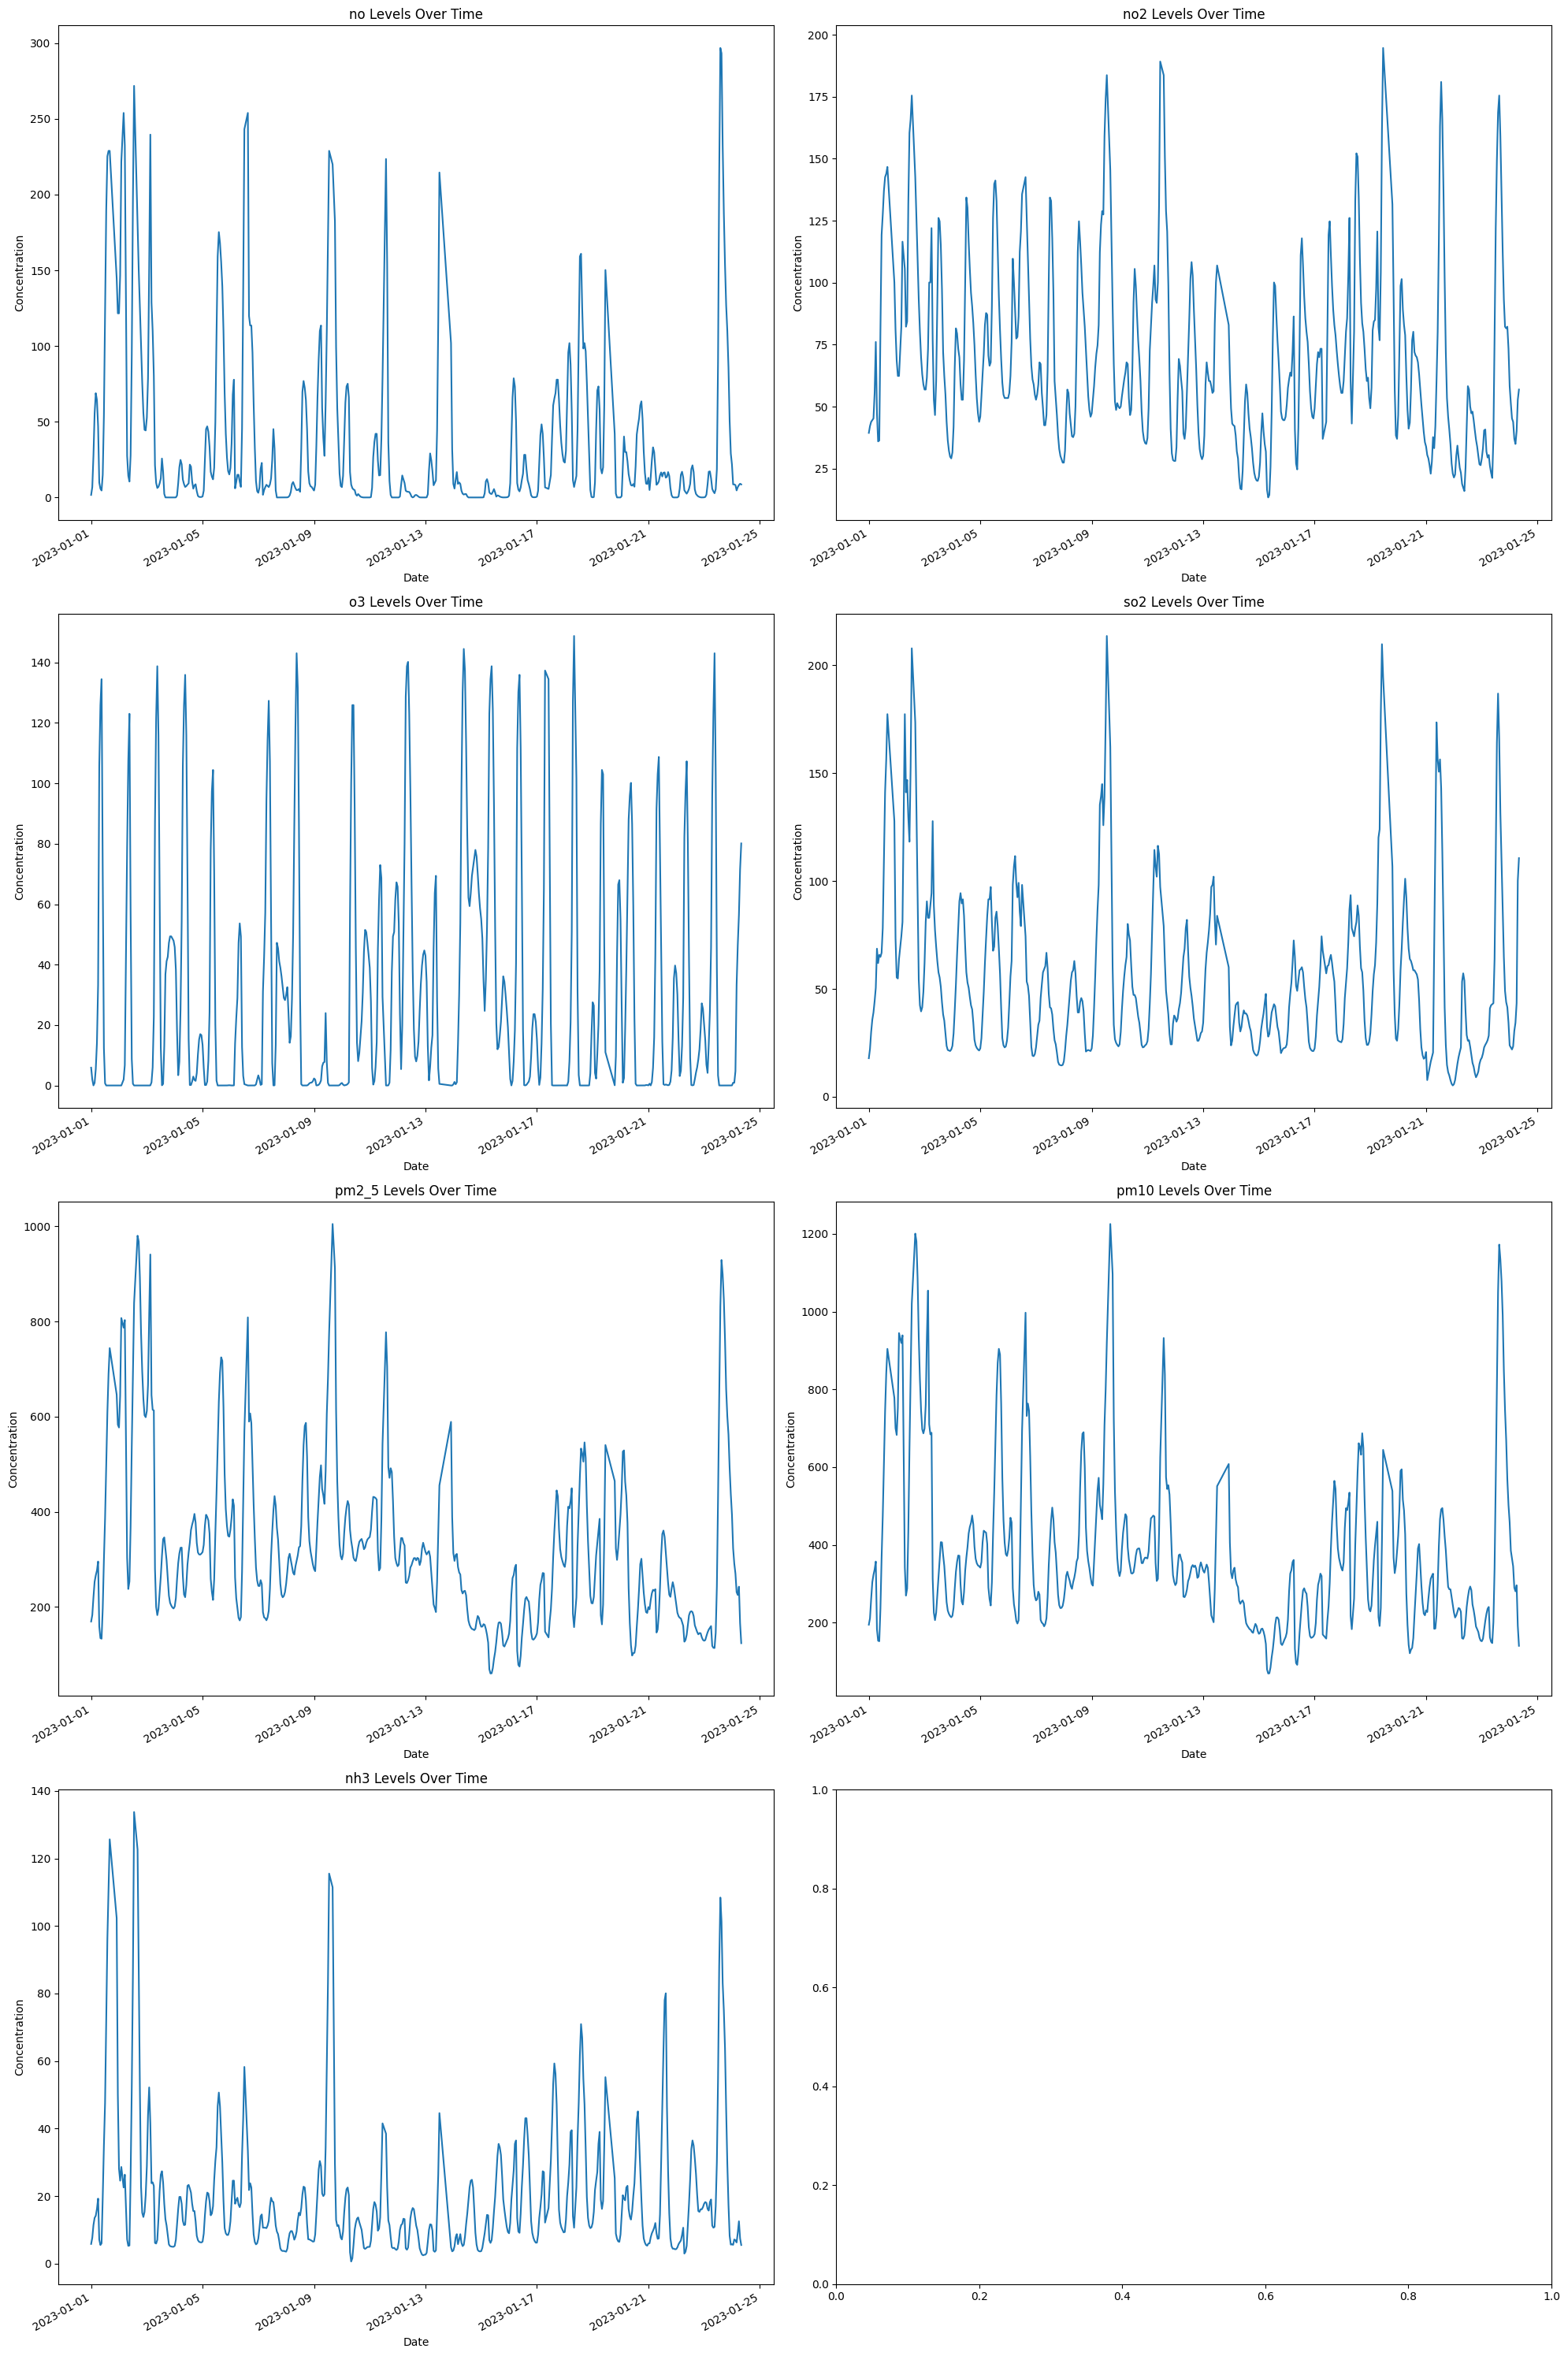

In [ ]:
# Create time series plots for each pollutant
# df.index = pd.to_datetime(df['date'])  # Assuming you have a 'date' column
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(df.columns[1:]):  # Skip the date column
    df[col].plot(ax=axes[i])
    axes[i].set_title(f'{col} Levels Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration')

plt.tight_layout()
plt.show()


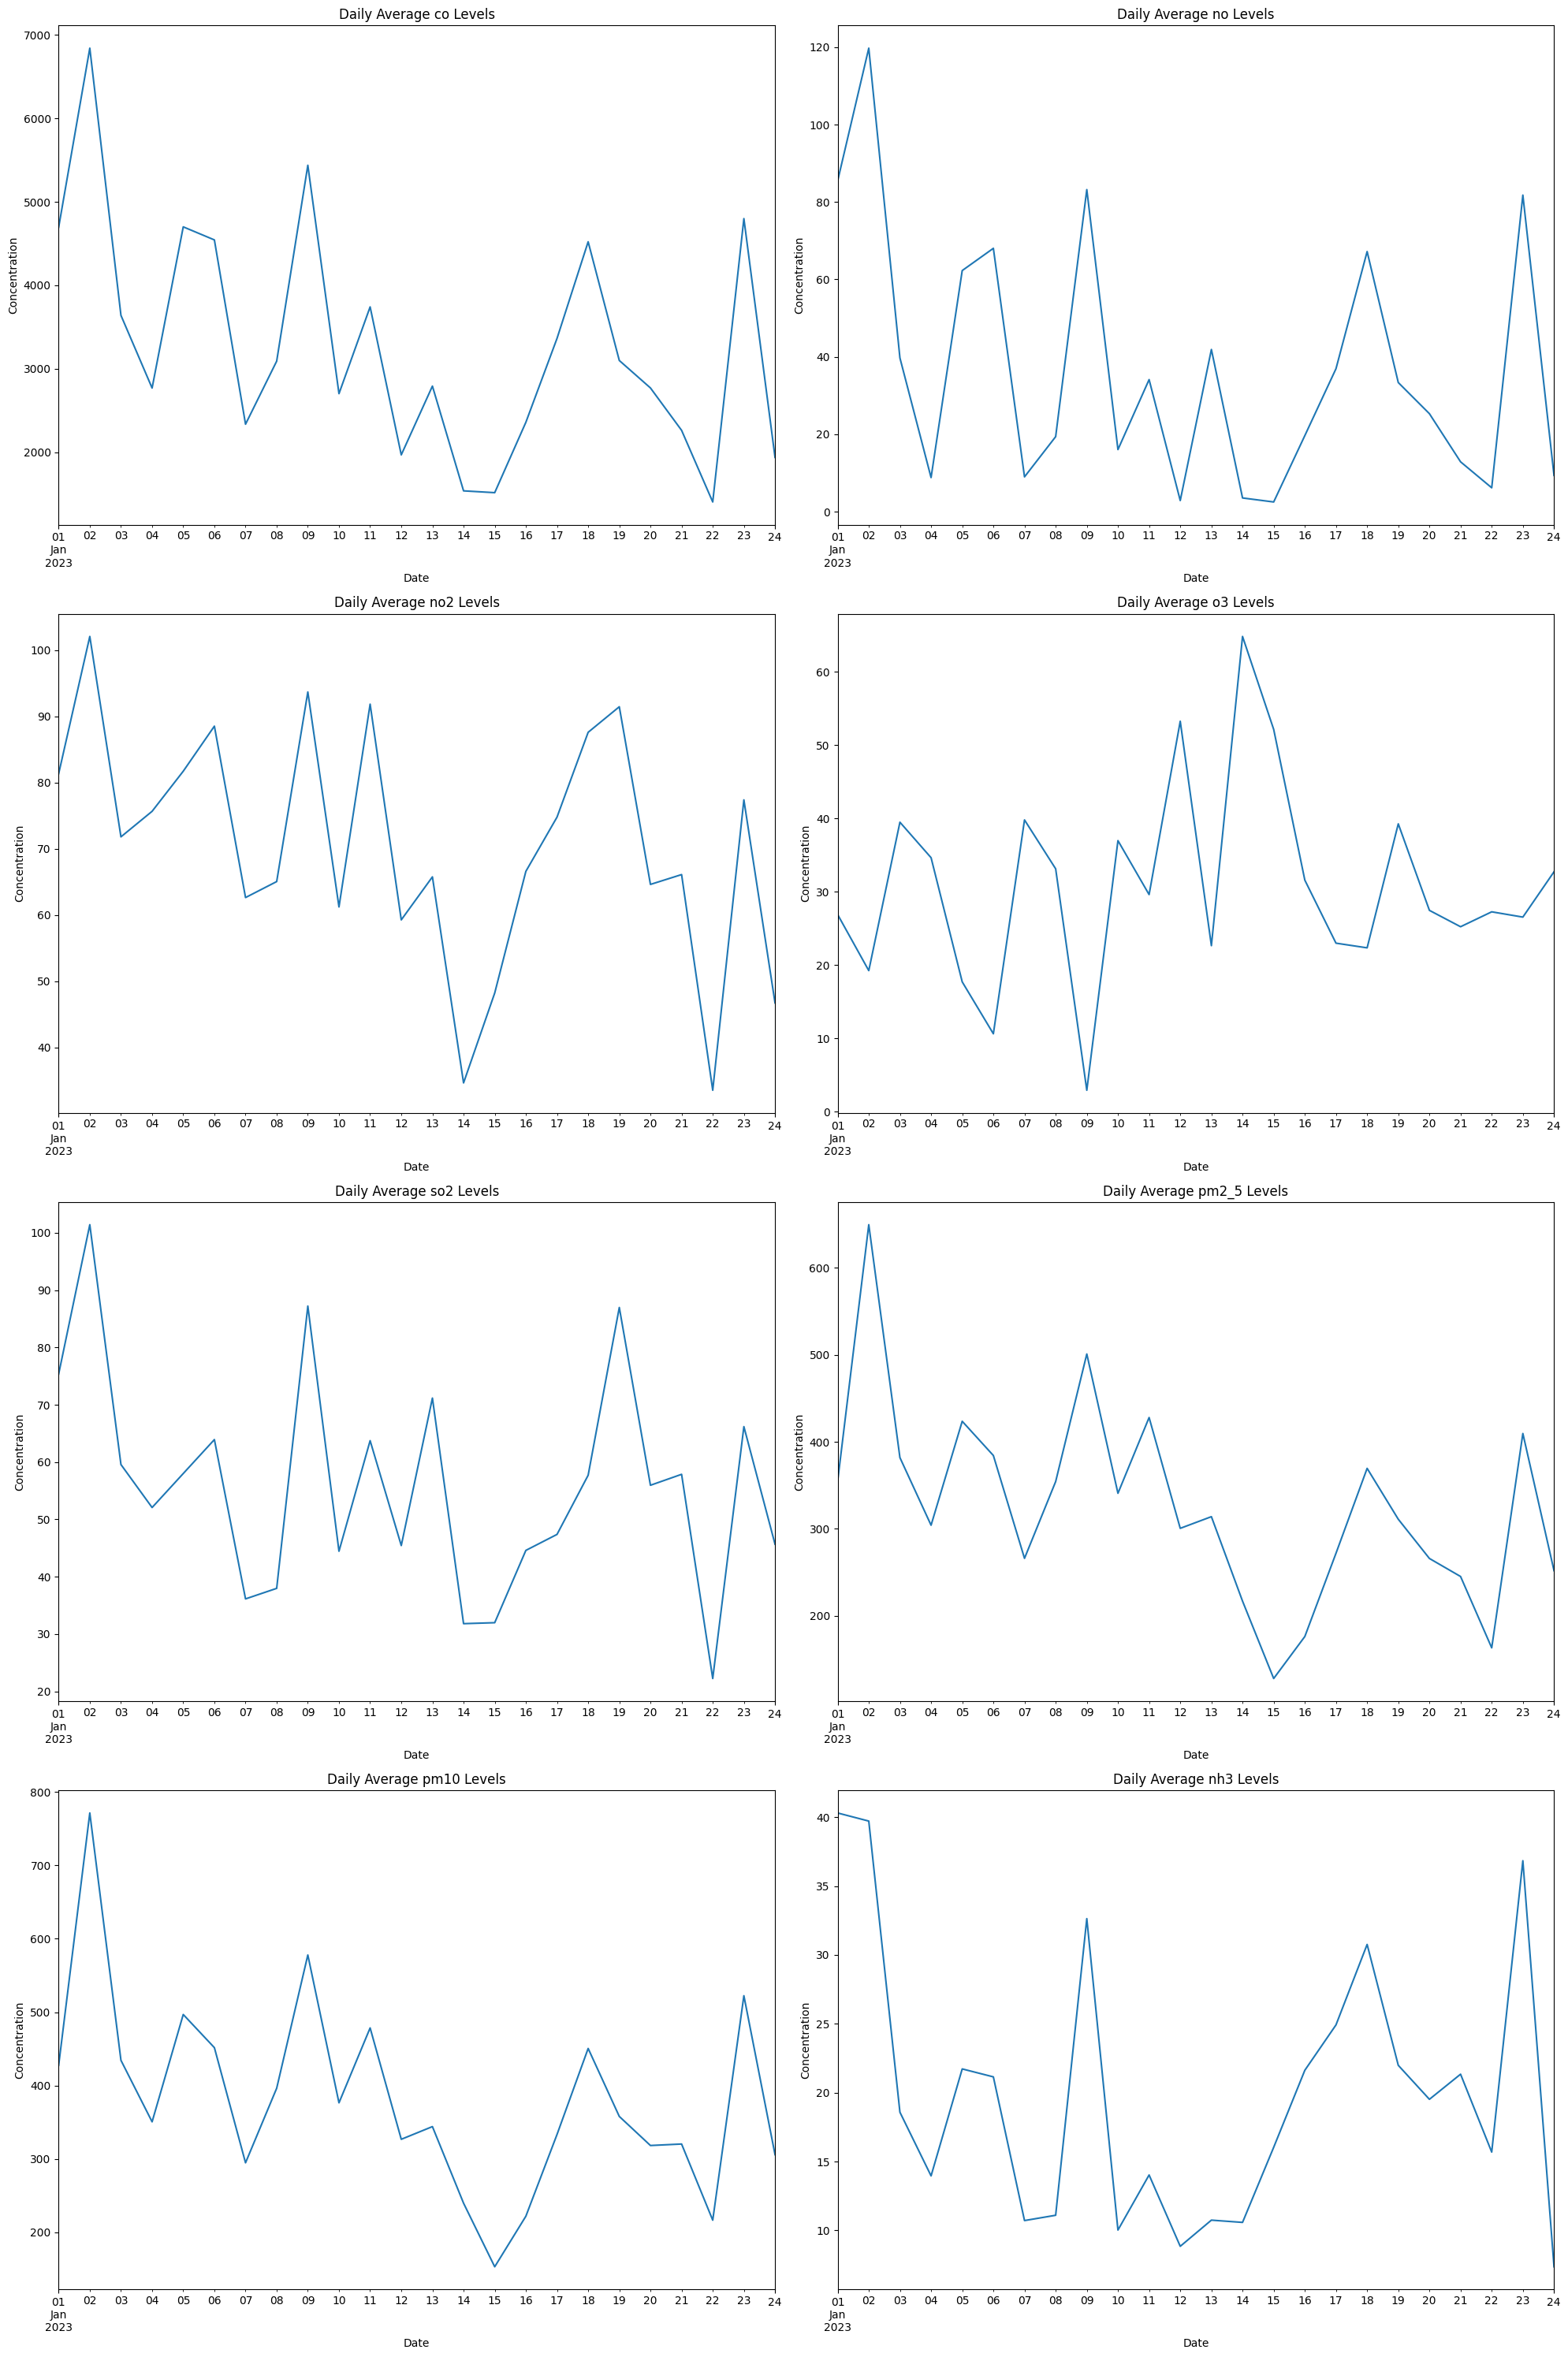

In [ ]:
# Set the 'date' column as the index if needed
# df.set_index('date', inplace=True)

# Calculate daily averages and plot
daily_avg = df.resample('D').mean()

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(daily_avg.columns):
    daily_avg[col].plot(ax=axes[i])
    axes[i].set_title(f'Daily Average {col} Levels')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration')

plt.tight_layout()
plt.show()


In [ ]:
# Identify days with highest pollution levels for each pollutant
for col in df.columns[1:]:
    max_day = df[col].idxmax()
    print(f"Highest {col} level: {df[col].max()} on {max_day.date()}")

# Perform basic statistical tests
# For example, let's check if there's a significant correlation between PM2.5 and PM10
correlation, p_value = stats.pearsonr(df['pm2_5'], df['pm10'])
print(f"Correlation between PM2.5 and PM10: {correlation}")
print(f"P-value: {p_value}")

Highest no level: 296.83 on 2023-01-23
Highest no2 level: 194.67 on 2023-01-19
Highest o3 level: 148.77 on 2023-01-18
Highest so2 level: 213.62 on 2023-01-09
Highest pm2_5 level: 1004.77 on 2023-01-09
Highest pm10 level: 1225.53 on 2023-01-09
Highest nh3 level: 133.75 on 2023-01-02
Correlation between PM2.5 and PM10: 0.9917888771251042
P-value: 0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20db64c5-5e79-482f-a191-958161980bbf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>